## Introduction

The setting up of a new business establishment is always a headache for new business owners. Conventional thinking is that location would determine the success or failure of a new retail outlet. In this case that we will be looking into, the context would be a budding entrepeneur looking to set up his first cafe in the city of New York.

## Data

FourSquare API has kindly provided 2 kinds of data which will be useful for our analysis. The first is geographical coordinates in the form of latitude and longitude. We will be using these coordinates to numerically define the addresses of locations of interest which we are analyzing. The second is pricing data which is given in a categorical form. Each establishment is ranked by price tier ranging from 1 to 5. We will be using this as a proxy to measuring the pricing power of cafes.

## Setting Up Libraries & FourSquare API

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

In [23]:
#User Authentication: I have removed my ID and Secret value for security reasons

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


## Exploratory Analysis

In [7]:
#Generating coordinates of New York
address = 'New York'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('Coordinates of New York: (',latitude,',',longitude,')')

Coordinates of New York: ( 40.7127281 , -74.0060152 )


In [8]:
#Explore Coffee Shops in a 30mile radius around New York
LIMIT = 50
search_query = 'coffee' 
radius = 48000 
print(search_query + ' .... OK!')
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

coffee .... OK!


In [9]:
#Generate DF of 50 Coffee Shops in our search area

#Convert JSON results into DF
results = requests.get(url).json()
venues = results['response']['venues']
df = json_normalize(venues)

#Keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in df.columns if col.startswith('location.')] + ['id']
df_filtered = df.loc[:, filtered_columns]

#Function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#Filters the category for each row
df_filtered['categories'] = df_filtered.apply(get_category_type, axis=1)

#Clean column names by keeping only last term
df_filtered.columns = [column.split('.')[-1] for column in df_filtered.columns]
df_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,For Five Coffee Roasters,Coffee Shop,1 Liberty Plz,US,New York,United States,Broadway,522,"[1 Liberty Plz (Broadway), New York, NY 10006,...","[{'label': 'display', 'lat': 40.709554, 'lng':...",40.709554,-74.010576,NaN,10006,NY,5cf965947564f7002c79aa21
1,Blue Spoon Coffee Co.,Coffee Shop,76 Chambers St,US,New York,United States,at Broadway,202,"[76 Chambers St (at Broadway), New York, NY 10...","[{'label': 'display', 'lat': 40.71442758460976...",40.714428,-74.006859,NaN,10007,NY,49c79540f964a520af571fe3
2,For Five Coffee Roasters,Coffee Shop,NaN,US,New York,United States,NaN,752,"[New York, NY 10280, United States]","[{'label': 'display', 'lat': 40.71224, 'lng': ...",40.712240,-74.014915,NaN,10280,NY,5dba113267232c000803cb37
3,Coffee Cart,Coffee Shop,60 Centre St,US,New York,United States,Broadway and chambers,328,"[60 Centre St (Broadway and chambers), New Yor...","[{'label': 'display', 'lat': 40.714389, 'lng':...",40.714389,-74.002791,NaN,10007,NY,4bffbb33daf9c9b65197faef
4,Proof Coffee Roaster,Coffee Shop,65 Nassau St,US,New York,United States,NaN,420,"[65 Nassau St, New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.70947645413928...",40.709476,-74.008546,NaN,10038,NY,55f05a02498ea2939736f07a
5,Hudson/Chambers Coffee Cart,Food Truck,Chambers St,US,New York,United States,at Hudson St,443,"[Chambers St (at Hudson St), New York, NY 1000...","[{'label': 'display', 'lat': 40.71563827489798...",40.715638,-74.009613,NaN,10007,NY,50a38463e4b0d1371722335f
6,Coffee Cart C0549,Food Truck,NaN,US,New York,United States,NaN,626,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.70753171014427...",40.707532,-74.008876,NaN,NaN,NY,4ca3382ef832a1cd87749be5
7,John & William St. Coffee Cart,Breakfast Spot,William St,US,New York,United States,John St,520,"[William St (John St), New York, NY, United St...","[{'label': 'display', 'lat': 40.70824579118402...",40.708246,-74.007774,NaN,NaN,NY,4c3c658e7c1ee21ebf748c71
8,Mary's Coffee Shop,Coffee Shop,25-15 Queens Plz N,US,Long Island City,United States,NaN,8,"[25-15 Queens Plz N, Long Island City, NY 1110...","[{'label': 'display', 'lat': 40.71278567220636...",40.712786,-74.005944,NaN,11101,NY,4b475390f964a520f12e26e3
9,Kaigo Coffee Room,Coffee Shop,120 Lafayette St Frnt C,US,New York,United States,NaN,811,"[120 Lafayette St Frnt C, New York, NY 10013, ...","[{'label': 'display', 'lat': 40.71863256946489...",40.718633,-74.000367,NaN,10013,NY,583af456ce593d41644bd7a6


In [10]:
#Retrieve price tier details of each establishment
store_id = df_filtered['id']
store_pricetier = {}

for i in store_id:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        store_pricetier[i] = result['response']['venue']['price']['tier']
    except:
        store_pricetier[i] = np.nan

In [11]:
df_filtered['price_tier'] = list(store_pricetier.values())
df_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id,price_tier
0,For Five Coffee Roasters,Coffee Shop,1 Liberty Plz,US,New York,United States,Broadway,522,"[1 Liberty Plz (Broadway), New York, NY 10006,...","[{'label': 'display', 'lat': 40.709554, 'lng':...",40.709554,-74.010576,NaN,10006,NY,5cf965947564f7002c79aa21,1.0
1,Blue Spoon Coffee Co.,Coffee Shop,76 Chambers St,US,New York,United States,at Broadway,202,"[76 Chambers St (at Broadway), New York, NY 10...","[{'label': 'display', 'lat': 40.71442758460976...",40.714428,-74.006859,NaN,10007,NY,49c79540f964a520af571fe3,2.0
2,For Five Coffee Roasters,Coffee Shop,NaN,US,New York,United States,NaN,752,"[New York, NY 10280, United States]","[{'label': 'display', 'lat': 40.71224, 'lng': ...",40.712240,-74.014915,NaN,10280,NY,5dba113267232c000803cb37,1.0
3,Coffee Cart,Coffee Shop,60 Centre St,US,New York,United States,Broadway and chambers,328,"[60 Centre St (Broadway and chambers), New Yor...","[{'label': 'display', 'lat': 40.714389, 'lng':...",40.714389,-74.002791,NaN,10007,NY,4bffbb33daf9c9b65197faef,1.0
4,Proof Coffee Roaster,Coffee Shop,65 Nassau St,US,New York,United States,NaN,420,"[65 Nassau St, New York, NY 10038, United States]","[{'label': 'display', 'lat': 40.70947645413928...",40.709476,-74.008546,NaN,10038,NY,55f05a02498ea2939736f07a,1.0


In [12]:
#Generate map of New York showing the 50 coffee shops
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(df_filtered.lat, df_filtered.lng, df_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

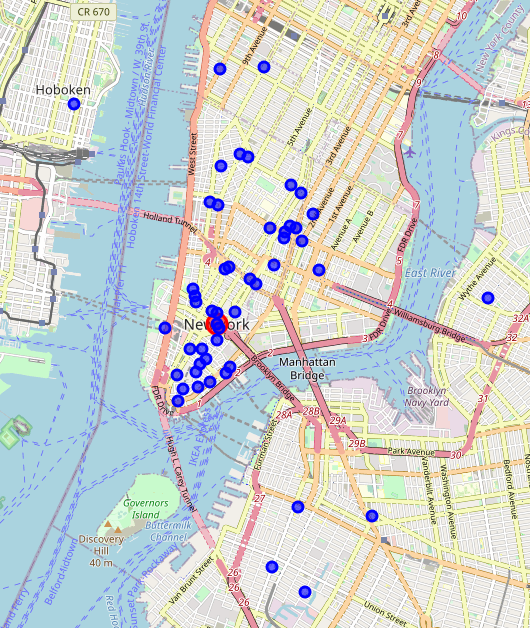

## kMeans Clustering

In [13]:
df_coffee = df_filtered[['lat', 'lng']]
df_coffee.dropna(inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


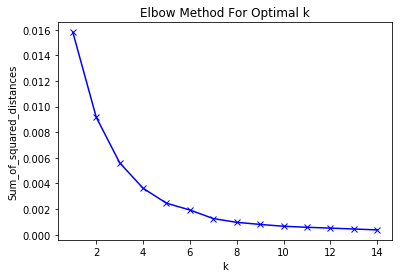

In [14]:
#Determine Optimal k value
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_coffee)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

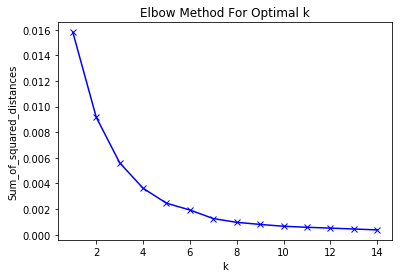

From the diagram above, the optimal k value is 6.

In [15]:
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_coffee)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 2], dtype=int32)

In [16]:
df_coffee = df_filtered[['name','lat', 'lng']]
df_coffee['Cluster Labels'] = kmeans.labels_

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [17]:
#Plot the 6 clusters on the map of New York

from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_coffee['lat'], df_coffee['lng'], df_coffee['name'], df_coffee['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

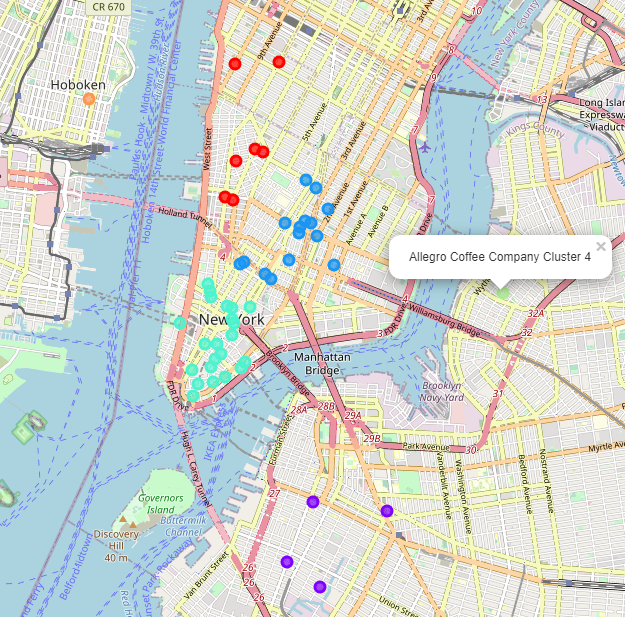

#### Cluster Legend
Red: Cluster 0\
Purple: Cluster 1\
Dark Blue: Cluster 2\
Teal: Cluster 3\
Light Green: Cluster 4\
Orange: Cluster 5

## Analysis & Inference

#### Effect of Location on Pricing Power

Of the 6 clusters created:\
Clusteres 0, 2 and 3 exhibit proper clustering of coffee shop stores.\
Clusters 4 and 5 are treated as outliers since only 1 coffee shop makes up each cluster.\
Cluster 1 appears to be a cluster but individual shops are very far apart from each other. As such, we will treat cluster 2 shops as outliers too.

In [18]:
df_coffee['Price_Tier'] = list(store_pricetier.values())
df_coffee.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,name,lat,lng,Cluster Labels,Price_Tier
0,For Five Coffee Roasters,40.709554,-74.010576,3,1.0
1,Blue Spoon Coffee Co.,40.714428,-74.006859,3,2.0
2,For Five Coffee Roasters,40.712240,-74.014915,3,1.0
3,Coffee Cart,40.714389,-74.002791,3,1.0
4,Proof Coffee Roaster,40.709476,-74.008546,3,1.0


In [19]:
#Analyse the mean pricing power of coffee shops in each cluster
cluster_concentrated = df_coffee['Cluster Labels'].isin([0, 2, 3])
df_coffee_concentrated = df_coffee[cluster_concentrated]

df_coffee_concentrated.groupby(['Cluster Labels']).mean()

,lat,lng,Price_Tier
Cluster Labels,,,
0,40.735975,-74.003445,1.333333
2,40.723547,-73.995317,1.153846
3,40.709929,-74.008406,1.238095


Of the 3 clusters, cluster 0 exhibits the greatest mean pricing power. Considering the small number of coffee shops there, it suggests slightly less than half have the power to charge prices higher.\
Clusters 0 and 1 are the two largest and exhibit poor pricing power. The low mean values suggest that in general, majority of the shops have to charge low.

In [20]:
#Merge all the outliers together to analyse their pricing powers
cluster_others = df_coffee['Cluster Labels'].isin([1,4,5])
df_coffee_outliers = df_coffee[cluster_others]
df_coffee_outliers.mean()

lat               40.698874
lng              -73.991481
Cluster Labels     2.166667
Price_Tier         1.166667
dtype: float64

Surprisingly, despite being fewer in number and more spread out from each other, these coffee shops charge low as observed by the low mean pricing value.

## Evaluation & Conclusion

From the results obtained, a few possible hypothesis can be put forth:\
\
1) In clusters where many coffee shops are set up close to each other, pricing power is poorer. This might be due to increased competition that puts pressure on individual shop pricing power. We notice that such high density clusters tend to be at or just adjacent to the financial centre of New York city. This might be due to the attraction of higher footfall and wealthier customers.\
\
2) Outlier clusters do not show higher pricing power despite the lack of competition around them. We note that they are situated outside of the financial district so lower footfall or less wealthy customers might force them to offer products at lower prices.\
\
3) Only cluster 5 showed some meaningful higher pricing power. We note that cluster 5 has fewer shops bunched up in that neighbourhood and so a few shops of tier 2 pricing could inflate the mean value and lead to inaccurate conclusions.


## Visualization of Expensive Coffee Shops

In [21]:
df_coffee_price2 = df_coffee[df_coffee['Price_Tier']==2.0]
df_coffee_price2

,name,lat,lng,Cluster Labels,Price_Tier
1,Blue Spoon Coffee Co.,40.714428,-74.006859,3,2.0
13,Gregorys Coffee,40.705200,-74.007090,3,2.0
14,Gregorys Coffee,40.706110,-74.012850,3,2.0
24,West Side Coffee Shop,40.720174,-74.003915,2,2.0
26,East One Coffee Roasters,40.681128,-73.996526,1,2.0
28,Gregorys Coffee,40.704341,-74.011857,3,2.0
33,Birch Coffee,40.710759,-74.005953,3,2.0
34,Brooklyn Bagel & Coffee Co.,40.746237,-73.997931,0,2.0
37,Partners Coffee Roasters,40.734913,-74.002051,0,2.0
49,Coffee Project,40.727153,-73.989527,2,2.0


In [22]:
#Generate map of New York showing 50 individual "Coffee" named stores
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng in zip(df_coffee_price2.lat, df_coffee_price2.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Cluster 1 is where most of the higher pricing power coffee shops are situated. Hence, location is important when determining pricing power due to access to higher income customers. Note, however many more coffee shops charge lower so these few expensive coffee shops must have other factors, such as better product offerings to justify their prices. Further investigation is needed.